In [241]:
import pandas as pd
import numpy as np

#### 1. Data collection

In [859]:
df = pd.read_csv('loan_default_prediction_project.csv')

In [860]:
df.head().T

,0,1,2,3,4
Age,56,46,32,60,25
Gender,Male,NaN,Male,Female,Female
Income,71266.105175,37283.054601,69567.036392,72016.087392,32161.98825
Employment_Status,Employed,Employed,Employed,Employed,Unemployed
Location,Suburban,Suburban,Urban,Rural,Suburban
Credit_Score,639,474,750,435,315
Debt_to_Income_Ratio,0.007142,0.456731,0.329231,0.052482,0.450236
Existing_Loan_Balance,27060.188289,40192.994312,25444.262759,3122.213749,19197.350445
Loan_Status,Non-Default,Default,Default,Non-Default,Non-Default
Loan_Amount,13068.330587,15159.338369,6131.287659,37531.880251,41466.397989


In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


#### 2. Data Preprocessing

In [862]:
# df = df.dropna()

In [863]:
df['Age_enc'] = pd.cut(df['Age'], bins=5, labels=['Young_Adult', 'Adult', 'Mature_Adult', 'Middle_Age', 'Senior'])

In [864]:
df['Income_enc'] = pd.cut(df['Income'], bins=5, labels=['Low', 'Average', 'Good', 'High', 'Very_High'])

In [865]:
df['Credit_Score_enc'] = pd.cut(df['Credit_Score'], bins=5, labels=['Poor', 'Fair', 'Good', 'Very_Good', 'Excellent'])

In [866]:
df['Debt_to_Income_Ratio_enc'] = pd.cut(df['Debt_to_Income_Ratio'], bins=5, labels=['Excellent', 'Very_Good', 'Good', 'Fair', 'Poor'])

In [867]:
df['Existing_Loan_Balance_enc'] = pd.cut(df['Existing_Loan_Balance'], bins=5, labels=['Small', 'Medium', 'Big', 'Very Big', 'Huge'])

In [868]:
df['Loan_Amount_enc'] = pd.cut(df['Loan_Amount'], bins=5, labels=['Small', 'Medium', 'Big', 'Very Big', 'Huge'])

In [869]:
df['Interest_Rate_enc'] = pd.cut(df['Interest_Rate'], bins=5, labels=['Low', 'Average', 'Good', 'High', 'Very_High'])

In [870]:
df['Loan_Duration_Months_enc'] = pd.cut(df['Loan_Duration_Months'], bins=5, labels=['Tiny', 'Short', 'Medium', 'Long', 'Very_Long'])

In [871]:
na_list = df.isna().sum()[df.isna().sum() > 0].index.tolist()

In [872]:
na_list

['Gender', 'Employment_Status']

In [899]:

for na_col in na_list: 
    dg = df[df[na_col].isna()]
    dh = df[df[na_col].notna()]
    #print(dg)
    for i, row in dg.iterrows():
        dl = pd.DataFrame()
        for col in col_names:
            dk = dh[dh[col] == row[col]][na_col].value_counts(normalize=True).reset_index()
            dk['col'] = col
            dl = pd.concat([dk, dl], axis=0)   
        dl = dl.reset_index(drop=True)
        df.at[i, na_col] = dl.sort_values(by='proportion', ascending=False)[:len(dl) // 2][na_col].mode()[0]

        #print(dl.sort_values(by='proportion', ascending=False)[:len(dl) // 2][na_col])

In [900]:
df['Employment_Status'].value_counts()

Employment_Status
Employed      683
Unemployed    307
Name: count, dtype: int64

In [901]:
df['Gender'].value_counts()

Gender
Female    526
Male      464
Name: count, dtype: int64

#### a. Handling Outliers

In [902]:
df.describe()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,40.942424,59803.324632,570.347475,0.486263,25262.842723,27719.288920,11.541352,42.267677
std,13.474828,23011.857973,163.331687,0.296501,14192.889085,12941.180203,4.891344,17.135694
min,18.000000,20010.775440,250.000000,0.000628,80.059377,5060.998602,3.003148,12.000000
25%,29.000000,40756.358014,429.000000,0.220792,13708.266349,16810.203190,7.475972,27.000000
50%,42.000000,60148.328754,566.000000,0.487117,25490.619136,28045.155728,11.537942,42.000000
75%,52.000000,79615.905287,719.000000,0.736376,37280.533590,39184.167774,15.532023,57.000000
max,64.000000,99867.800911,849.000000,0.999849,49987.578171,49986.843702,19.991438,71.000000


In [876]:

# for i, row in dg.iterrows():
#     male = 0
#     female = 0
#     for col_name in col_names:
#         #col_name = col_names[1]
#         col_var = row[col_name]
#         #print(col_name, col_var)
#         for na_name in na_list:
#             if na_name != col_name:
#                 #print(na_name, col_name)
#                 dg_es = dh.groupby(na_name)[col_name].value_counts().reset_index()
                
#                 sel_col = (dg_es[col_name] == col_var)
#                 t = dg_es[sel_col]['count'].sum()
#                 na_var_list = dh[dh[na_name].notna()][na_name].unique().tolist()
#                 #print(na_var_list)
#                 for na_var in na_var_list:
#                     na_col = (dg_es[na_name] == na_var)
#                     pm = dg_es[sel_col & na_col].reset_index(drop=True)['count']#.loc[0]/t
#                     #print(pm)
#                     if not pm.empty:
#                         #print(na_name, na_var, col_var, pm.loc[0]/t)
#                         if pm.loc[0]/t > np.random.rand():
#                             male += 1
#                         else:
#                             female += 1
#                 #     print(f"{na_name}, {na_var}", "  = ",  pm)
#                 #print("----------------------------------------------") 
#     dg.at[i, 'Gender'] = 'Male' if male > female else 'Female'

In [877]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Employment_Status', ylabel='count'>

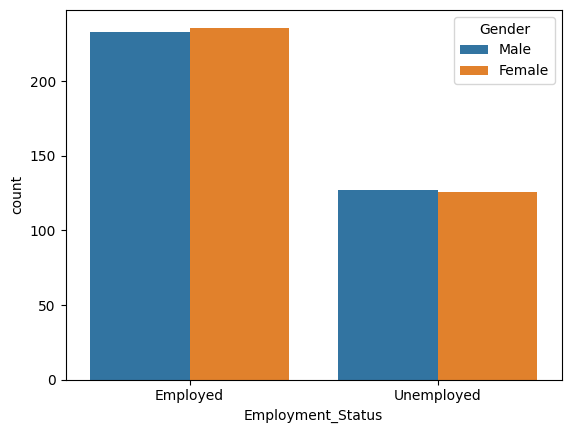

In [878]:
sns.countplot(x='Employment_Status', data=df, hue='Gender', legend=True)

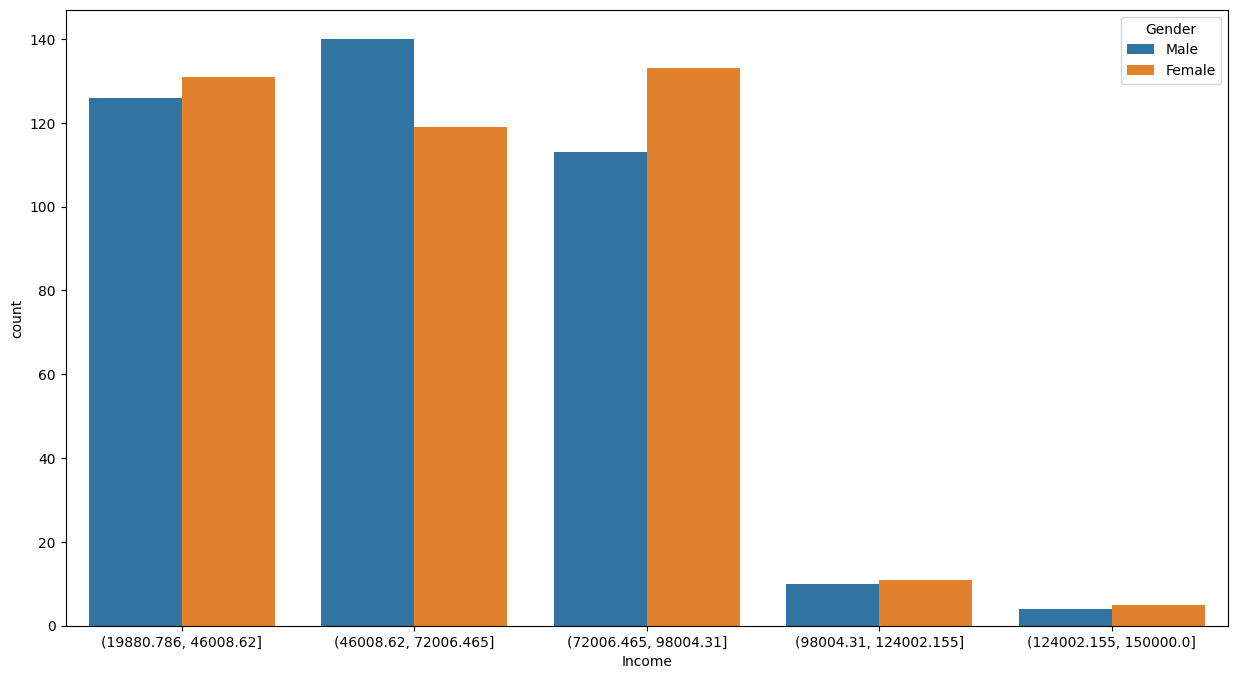

In [879]:
plt.figure(figsize=(15,8))
sns.countplot(x=pd.cut(df['Income'], bins=5), data=df, hue='Gender', legend=True)
plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

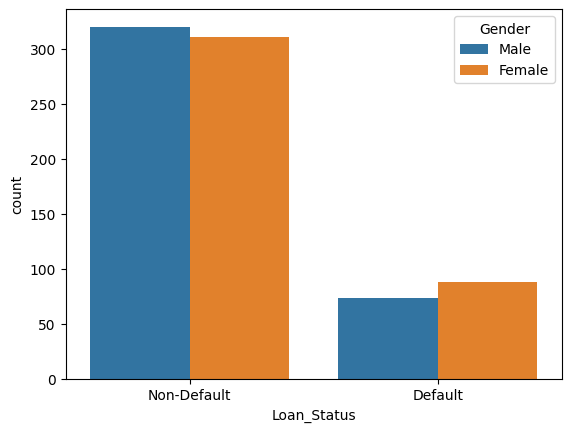

In [880]:
sns.countplot(x='Loan_Status', data=df, hue='Gender', legend=True)

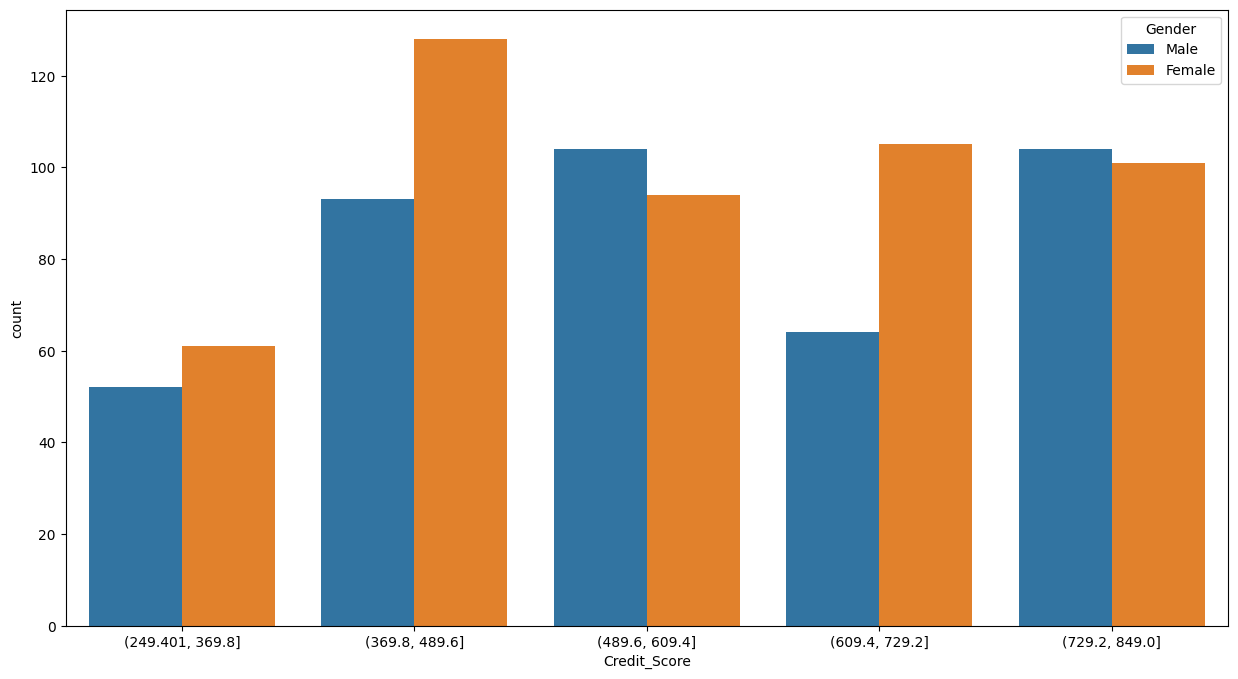

In [881]:
plt.figure(figsize=(15,8))
sns.countplot(x=pd.cut(df['Credit_Score'], bins=5), data=dh, hue='Gender', legend=True)
plt.show()

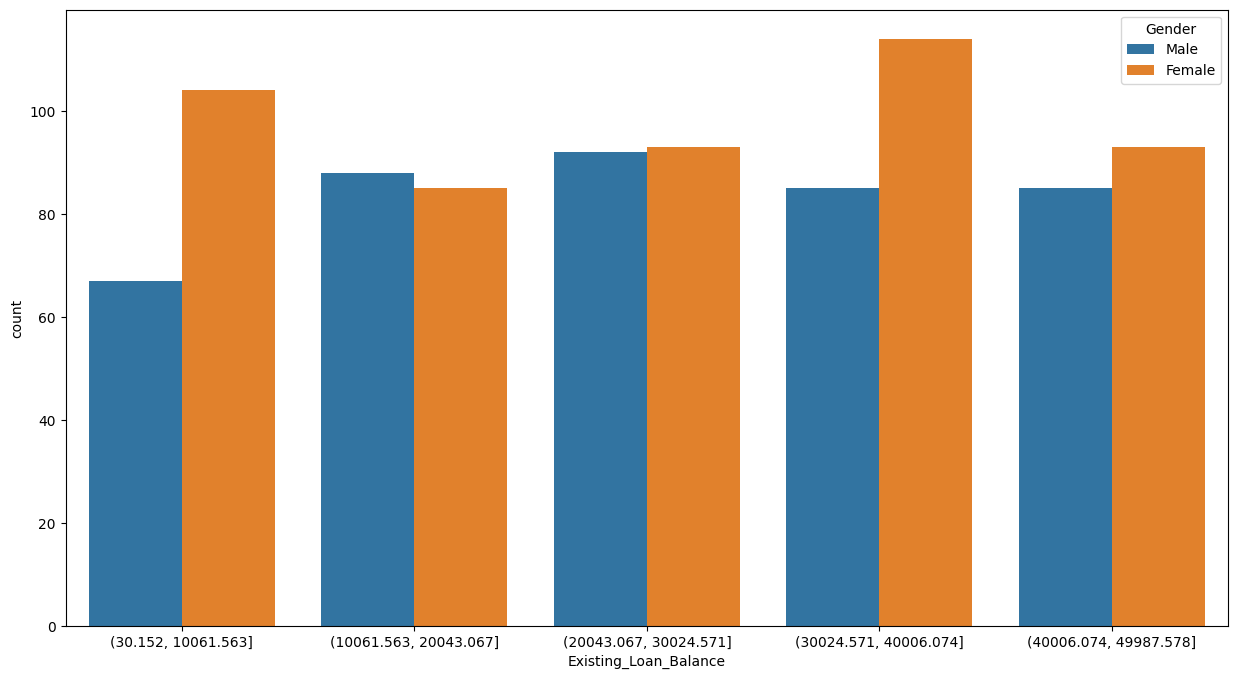

In [882]:
plt.figure(figsize=(15,8))
sns.countplot(x=pd.cut(df['Existing_Loan_Balance'], bins=5), data=dh, hue='Gender', legend=True)
plt.show()

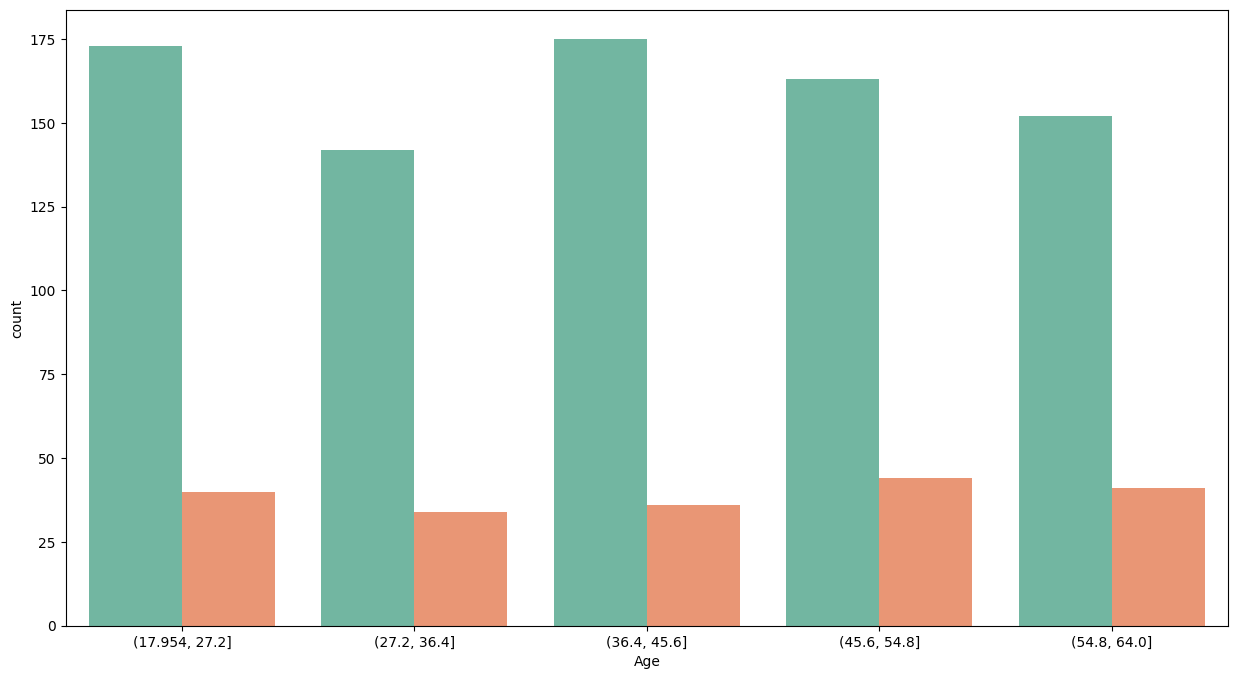

In [883]:
#sns.histplot(x='Age', data=df, hue='Income', bins=5, legend=False)

plt.figure(figsize=(15, 8))
var = 'Age'
bins = 5
sns.countplot(x=pd.cut(df[var], bins=bins), palette='Set2', hue='Loan_Status',  data=df, ax=plt.gca(), legend=False)
plt.show()

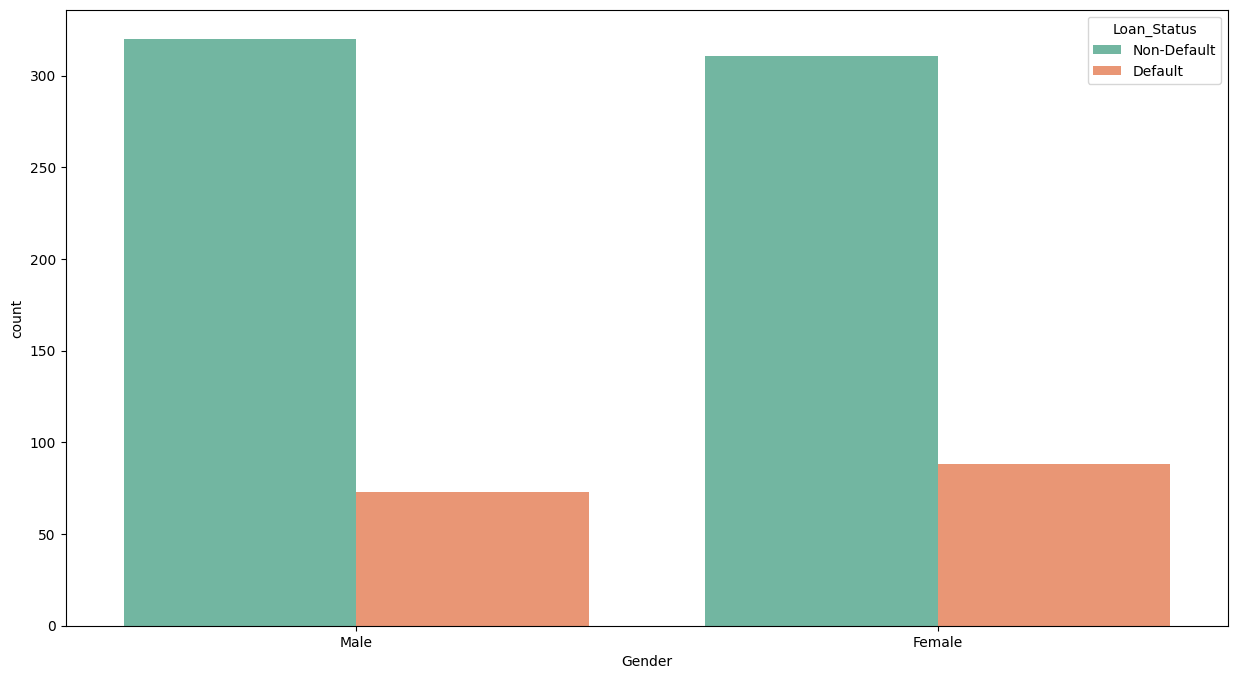

In [884]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Gender', palette='Set2', hue='Loan_Status',  data=df, ax=plt.gca(), legend=True)
plt.show()

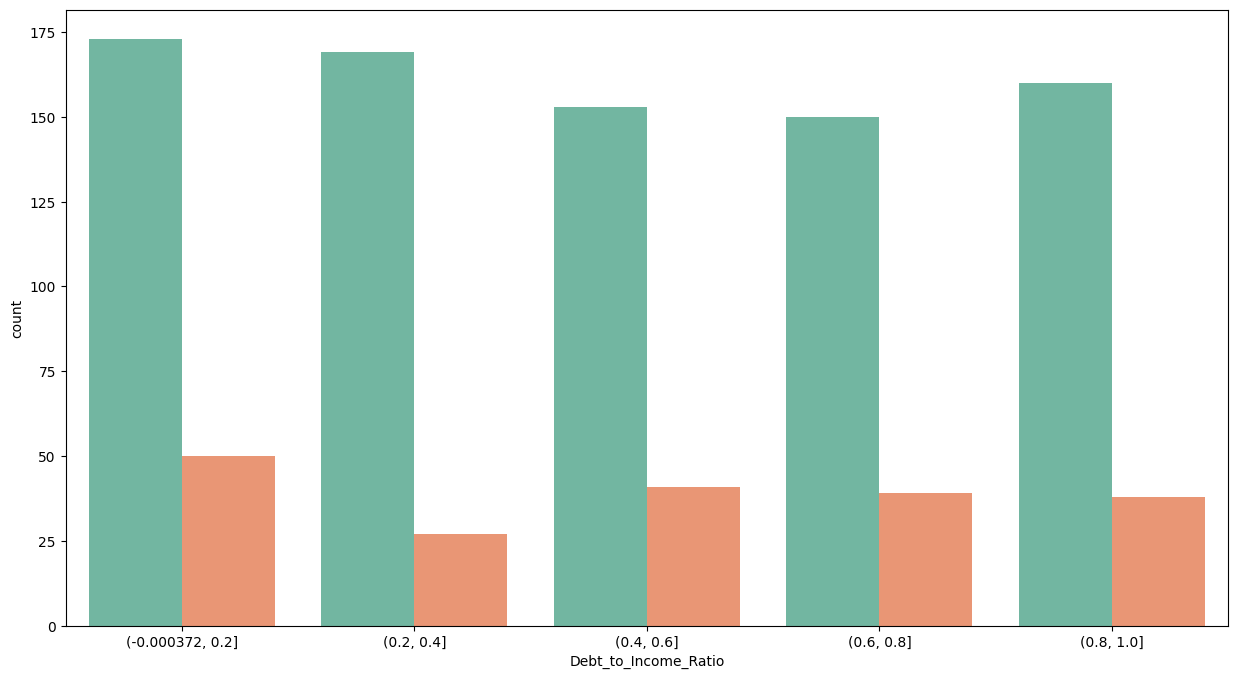

In [885]:
plt.figure(figsize=(15, 8))
sns.countplot(x=pd.cut(df['Debt_to_Income_Ratio'], bins=bins), palette='Set2', hue='Loan_Status',  data=df, ax=plt.gca(), legend=False)
plt.show()

In [886]:
df['Gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [887]:
df.describe()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,60705.291386,571.094000,0.485502,25239.656186,27636.369345,11.538267,42.221000
std,13.497852,24594.030383,163.395983,0.296466,14202.689890,12925.200961,4.883342,17.116867
min,18.000000,20010.775440,250.000000,0.000628,80.059377,5060.998602,3.003148,12.000000
25%,29.000000,40820.367273,429.000000,0.220606,13597.494593,16756.405848,7.483547,27.000000
50%,42.000000,60547.119929,567.000000,0.483633,25439.429898,27938.066858,11.537942,42.000000
75%,52.000000,80338.552791,720.250000,0.735476,37305.466739,39151.564233,15.499129,57.000000
max,64.000000,150000.000000,849.000000,0.999849,49987.578171,49986.843702,19.991438,71.000000


In [888]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Gender', ylabel='Count'>

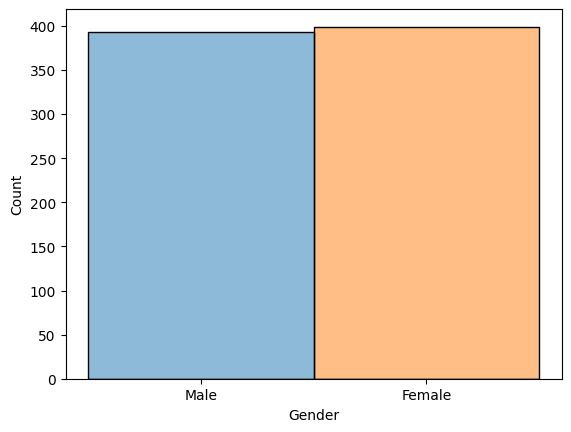

In [889]:
sns.histplot(x='Gender', hue='Gender', data=df, legend=False)

<Axes: xlabel='Loan_Status', ylabel='Count'>

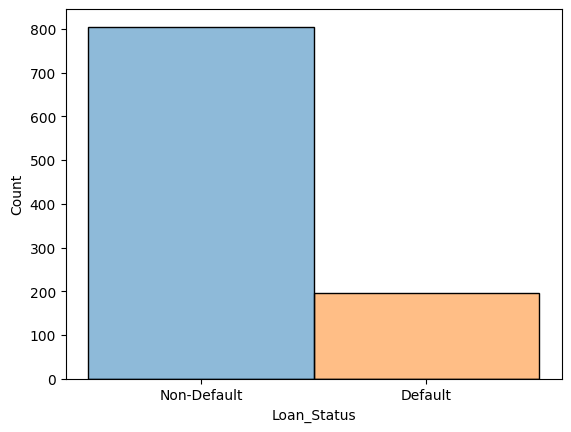

In [890]:
sns.histplot(x='Loan_Status', hue='Loan_Status', data=df, legend=False)

In [891]:
# df['Gender'] = df['Gender'].fillna('Unknown')

In [892]:
df['Gender'].value_counts()

Gender
Female    399
Male      393
Name: count, dtype: int64

In [893]:
# df['Employment_Status'] = df['Employment_Status'].fillna('Unknown')

In [894]:
df['Employment_Status'].value_counts()

Employment_Status
Employed      596
Unemployed    310
Name: count, dtype: int64

In [895]:
df['Loan_Status'].value_counts()

Loan_Status
Non-Default    805
Default        195
Name: count, dtype: int64

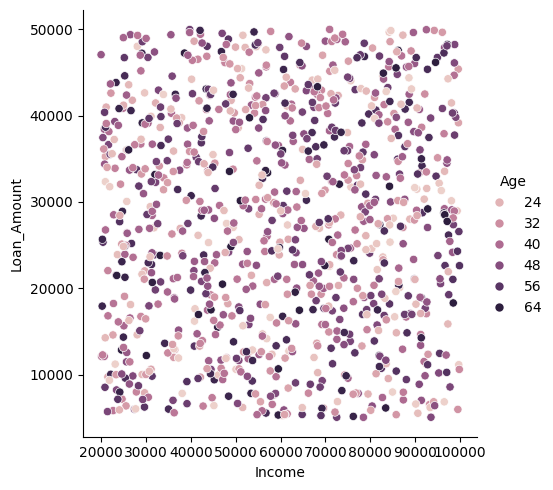

In [903]:
sns.relplot(data=df, x="Income", y="Loan_Amount", hue="Age")

In [898]:
df = df[df['Income'] < 1e5]

In [832]:
df['Loan_Status'].value_counts()

Loan_Status
Non-Default    799
Default        191
Name: count, dtype: int64

In [904]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [905]:
y.value_counts()

Loan_Status
Non-Default    799
Default        191
Name: count, dtype: int64

In [906]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        990 non-null    int64   
 1   Gender                     990 non-null    object  
 2   Income                     990 non-null    float64 
 3   Employment_Status          990 non-null    object  
 4   Location                   990 non-null    object  
 5   Credit_Score               990 non-null    int64   
 6   Debt_to_Income_Ratio       990 non-null    float64 
 7   Existing_Loan_Balance      990 non-null    float64 
 8   Loan_Amount                990 non-null    float64 
 9   Interest_Rate              990 non-null    float64 
 10  Loan_Duration_Months       990 non-null    int64   
 11  Age_enc                    990 non-null    category
 12  Income_enc                 990 non-null    category
 13  Credit_Score_enc           990 non-null 

In [907]:
X = X.select_dtypes(exclude=['category'])

In [908]:
X = pd.get_dummies(X)

In [909]:
X.head().T

,0,1,2,3,4
Age,56,46,32,60,25
Income,71266.105175,37283.054601,69567.036392,72016.087392,32161.98825
Credit_Score,639,474,750,435,315
Debt_to_Income_Ratio,0.007142,0.456731,0.329231,0.052482,0.450236
Existing_Loan_Balance,27060.188289,40192.994312,25444.262759,3122.213749,19197.350445
Loan_Amount,13068.330587,15159.338369,6131.287659,37531.880251,41466.397989
Interest_Rate,18.185533,11.727471,17.030462,16.868949,18.891582
Loan_Duration_Months,59,69,69,26,66
Gender_Female,False,True,False,True,True
Gender_Male,True,False,True,False,False


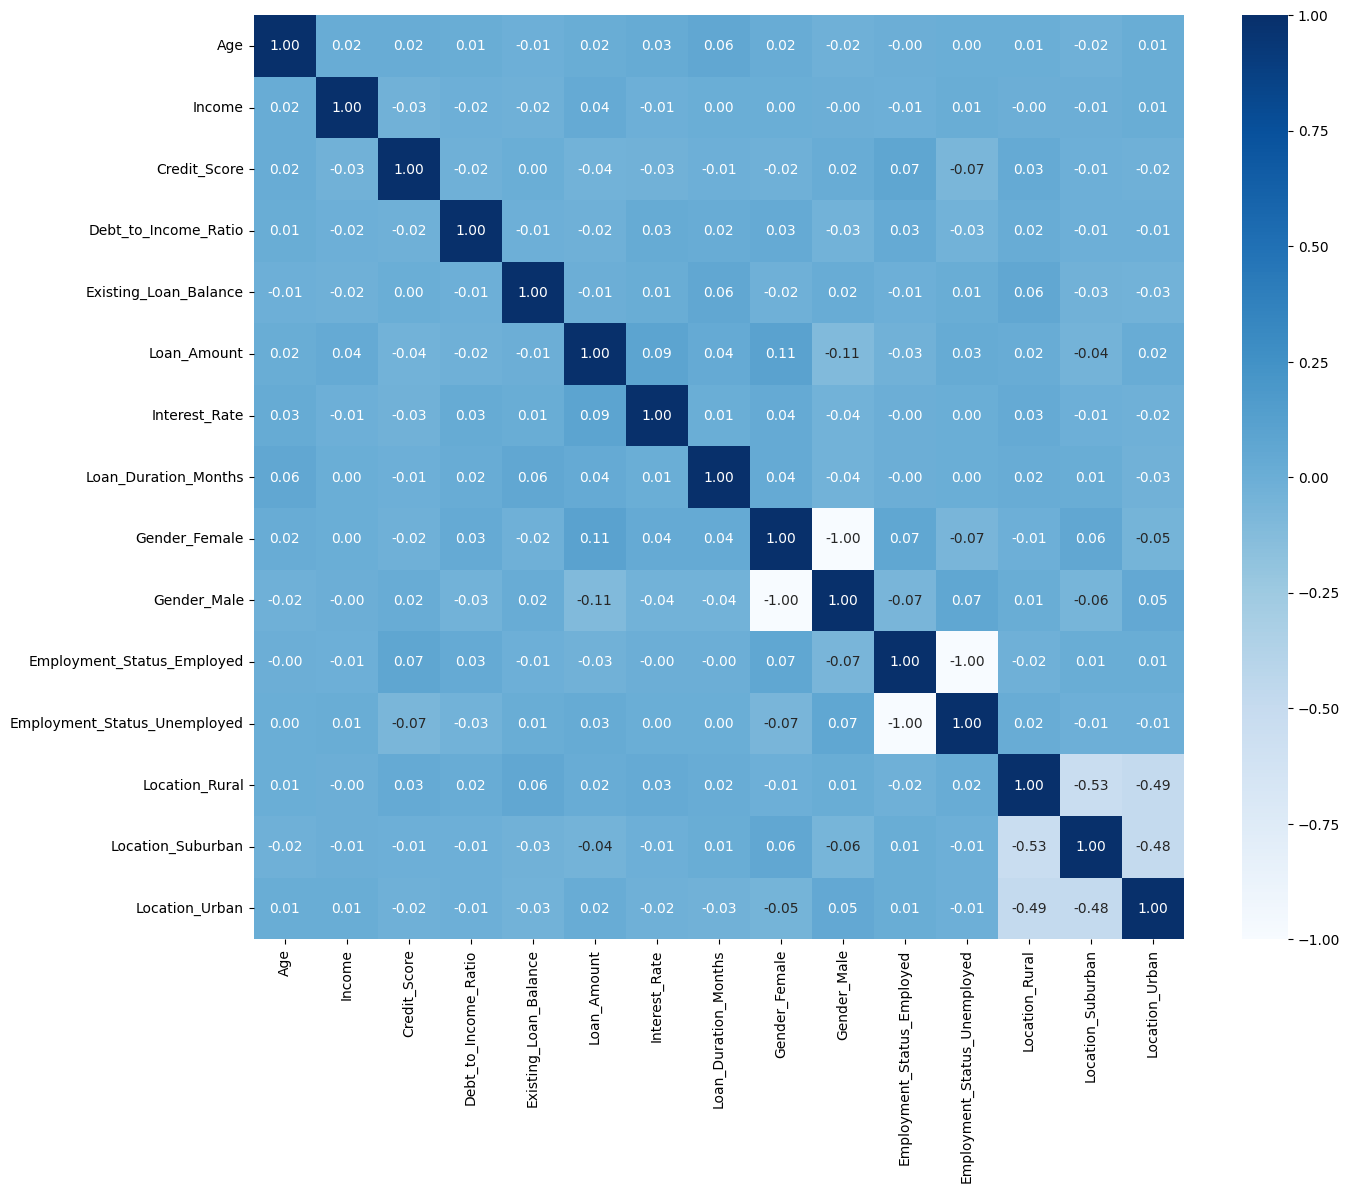

In [944]:
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(),  cmap='Blues', fmt='.2f', annot=True)
plt.show()

In [910]:
y = y.map({"Default": 1, "Non-Default": 0})

In [911]:
from sklearn.model_selection import train_test_split

In [912]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [842]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your training features and labels
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [843]:
y_train.value_counts()

Loan_Status
0    636
1    636
Name: count, dtype: int64

In [844]:
num_columns = X_train.select_dtypes(exclude=['object', 'bool']).columns.tolist()

In [845]:
num_columns

['Age',
 'Income',
 'Credit_Score',
 'Debt_to_Income_Ratio',
 'Existing_Loan_Balance',
 'Loan_Amount',
 'Interest_Rate',
 'Loan_Duration_Months']

In [920]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler

#scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler = QuantileTransformer()
#scaler = PowerTransformer()
#scaler = RobustScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (792). n_quantiles is set to n_samples.
  warnings.warn(


In [847]:
X_train.reset_index(drop=True)

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months,Gender_Female,Gender_Male,Employment_Status_Employed,Employment_Status_Unemployed,Location_Rural,Location_Suburban,Location_Urban
0,0.682683,0.562553,0.036968,0.461050,0.018503,0.442623,0.249898,0.680681,True,False,True,False,False,False,True
1,0.076577,0.579063,0.230230,0.933502,0.635063,0.693970,0.970069,0.356356,False,False,False,True,True,False,False
2,0.377878,0.036095,0.503003,0.620229,0.459797,0.020533,0.123556,0.639139,False,True,True,False,True,False,False
3,0.377878,0.808814,0.881882,0.358135,0.905627,0.906971,0.929192,0.680681,True,False,True,False,True,False,False
4,0.560060,0.383158,0.941942,0.030977,0.229221,0.759362,0.790787,0.795295,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0.184685,0.441279,0.450951,0.682305,0.664827,0.820671,0.780682,0.411912,True,True,False,True,True,True,False
1268,0.268769,0.336217,0.499499,0.427416,0.591383,0.465212,0.827808,0.159660,True,True,True,True,True,False,True
1269,0.533033,0.015746,0.896897,0.963521,0.836258,0.676677,0.387466,0.697698,False,True,True,False,True,True,False
1270,0.560060,0.224224,0.494995,0.712904,0.761443,0.484487,0.634935,0.490490,True,False,True,False,True,False,False


In [913]:
from sklearn.ensemble import RandomForestClassifier

In [914]:
model = RandomForestClassifier()

In [915]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [916]:
y_pred = model.predict(X_test)

In [917]:
from sklearn.metrics import classification_report

In [918]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       197
           1       0.03      1.00      0.06         1

    accuracy                           0.83       198
   macro avg       0.51      0.91      0.48       198
weighted avg       1.00      0.83      0.90       198



In [774]:
y_unknown_pred.shape

(200,)

In [921]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier



# Define the top 7 classifier models
models = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Cat Boost": CatBoostClassifier(verbose=0)
    # "Light GBM": LGBMClassifier(n_estimators=100)
}

final_results = {}

# Iterate over the models
for model_name, model in models.items():
    # Initialize an empty set to store selected features
    selected_features = []
    
    # Add the first feature in X_train.columns
    selected_features.append(X_train.columns[0])

    # Train the initial model with the selected feature
    model.fit(X_train[selected_features], y_train)

    # Calculate initial accuracy
    initial_accuracy = accuracy_score(y_test, model.predict(X_test[selected_features]))

    # Loop until all features are selected
    while len(selected_features) < len(X_train.columns):
        best_feature = None
        best_accuracy = initial_accuracy
        # Iterate through remaining features
        for feature in X_train.columns:
            if feature not in selected_features:
                # Add the feature and train the model
                selected_features.append(feature)
                model.fit(X_train[selected_features], y_train)
                # Calculate accuracy with the new feature
                accuracy = accuracy_score(y_test, model.predict(X_test[selected_features]))
                # If accuracy improved, update best_feature and best_accuracy
                if accuracy > best_accuracy:
                    best_feature = feature
                    best_accuracy = accuracy
                # Remove the feature for next iteration
                selected_features.remove(feature)
        # If a better feature is found, add it to selected_features
        if best_feature:
            selected_features.append(best_feature)
            initial_accuracy = best_accuracy
        else:
            # If no better feature is found, break the loop
            break

    # Train final model with selected features
    model.fit(X_train[selected_features], y_train)

    # Calculate final accuracy
    final_accuracy = accuracy_score(y_test, model.predict(X_test[selected_features]))
    # Calculate classification report
    report = classification_report(y_test, model.predict(X_test[selected_features]), target_names=['Yes', 'No'], output_dict=True)

    params = model.get_params()
    # Store the final accuracy and classification report for the model
    final_results[model_name] = {'accuracy': final_accuracy, 'classification_report': report, 'features': selected_features,
                                'params': params, 'model': model}

# Print final results for each model
for model_name, results in final_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['accuracy']}")
    print(f"Params: {results['params']}")
    print("Classification Report:")
    print(results['classification_report'])
    print(results['features'])
    print("-------------------------------------------------------")


C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Random Forest
Accuracy: 0.8232323232323232
Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Classification Report:
{'Yes': {'precision': 0.8232323232323232, 'recall': 1.0, 'f1-score': 0.9030470914127424, 'support': 163.0}, 'No': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 35.0}, 'accuracy': 0.8232323232323232, 'macro avg': {'precision': 0.4116161616161616, 'recall': 0.5, 'f1-score': 0.4515235457063712, 'support': 198.0}, 'weighted avg': {'precision': 0.6777114580144883, 'recall': 0.8232323232323232, 'f1-score': 0.743417555051904, 'support': 198.0}}
['Age']
-------------------------------------

C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [922]:
selected_features = final_results['KNN']['features']

In [923]:
final_results['KNN']['params']

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [924]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [925]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [926]:
param_grid = {
 'n_neighbors': [2,3,4,5,6,7],
 'weights': ['uniform','distance'],
 'algorithm': ['kd_tree','brute', 'ball_tree'],
 'metric': ['euclidean', 'minkowski'],
 'leaf_size': [2, 3, 4, 5, 10, 15, 20, 25, 30, 25, 40, 45, 50],
 'p': [2, 3, 4, 5, 6]
}

In [927]:
best_model = KNeighborsClassifier() 

In [928]:
grid_model = GridSearchCV(estimator=best_model, param_grid=param_grid, cv = 6, scoring='accuracy')

In [929]:
grid_model.fit(X_train1, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                         'leaf_size': [5, 10, 15, 20, 25, 30, 25, 40, 45, 50],
                         'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7], 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [930]:
y_pred1 = grid_model.predict(X_test1)

In [931]:
print(classification_report(y_pred1, y_test))
grid_model.best_params_

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       197
           1       0.03      1.00      0.06         1

    accuracy                           0.83       198
   macro avg       0.51      0.91      0.48       198
weighted avg       1.00      0.83      0.90       198



{'algorithm': 'brute',
 'leaf_size': 5,
 'metric': 'euclidean',
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [932]:
grid_model.score(X_test1, y_test)

0.8282828282828283

<Axes: >

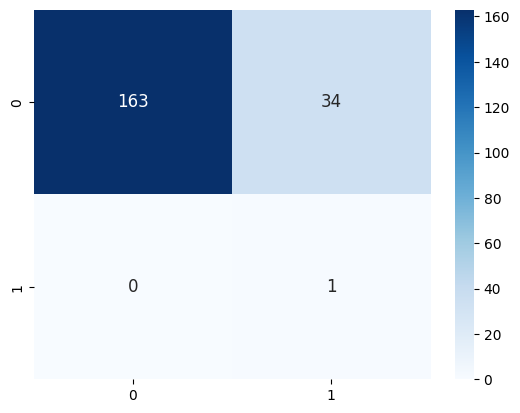

In [933]:
sns.heatmap(confusion_matrix(y_pred, y_test),  annot=True, cmap='Blues', fmt='g', annot_kws={"size": 12})

In [934]:
y_test.value_counts()

Loan_Status
0    163
1     35
Name: count, dtype: int64